## NovelAi stable-diffusion-webui+api 修复版（Kaggle云端部署项目，完全免费，无需任何配置！）
**torch: 2.0.0+cu118  •  xformers: 0.0.19**

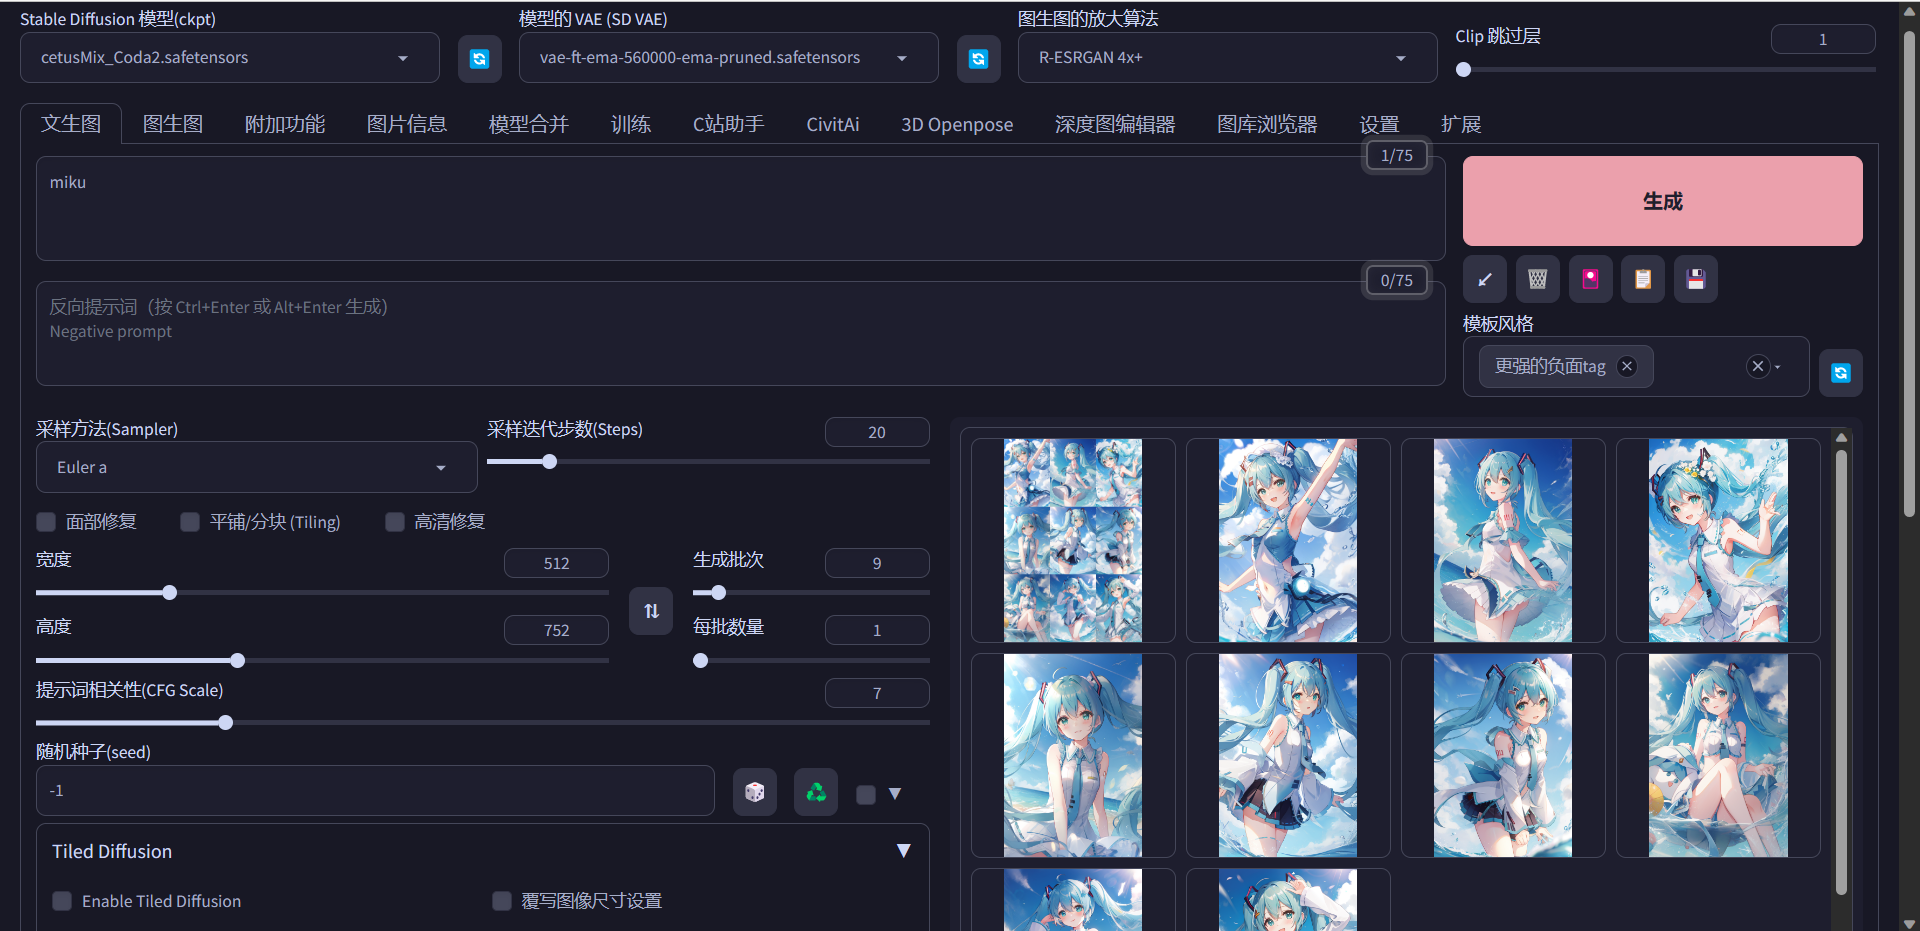



<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
    📌 2023年3月5日更新：现在支持通过下载链接上传模型了，省去了下载模型后再上传后的麻烦.（）
</div>
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
    📌 2023年5月15日更新：现在可以双开webui了，可以双线程跑图（GPU请选择 T4 x2 ， 将use2设置为True）
</div>

# 注意事项/WARNING：
- ### 1.将设置中的PERSISTENCE改为Files Only方便下次打开提高启动速度，第一次启动后下载Python环境包就不用下载第二次了
- ### 2.检测到出现涩图会容易导致封号现象，建议到webui设置里把'始终保存所有生成的图像'和‘始终保存所有生成的宫格图’关了

In [1]:
# 安装目录
install_path="/kaggle/working" #或者/kaggle
updata_webui = False  #是否开机自动更新webui

# 重置变量 会删掉sd_webui重新安装
reLoad = False

#清理和打包生成的图片
zip_output=True
clear_output=True

# 使用huggingface保存和载入webui配置文件
huggingface_use = True
huggingface_token_file = '/kaggle/input/hugfacetoken/hugfacetoken.txt'
huggiingface_repo_id = 'ACCA225/sdconfig'
# 将会同步的文件
yun_files = ['ui-config.json','config.json','styles.csv']



In [2]:
#模型和插件

# 插件列表： git仓库地址
# 不需要的插件在前面加 # ，插件地址之间需要用英语逗号隔开
extensions = [
    'https://github.com/Elldreth/loopback_scaler',
    'https://github.com/jexom/sd-webui-depth-lib',
    'https://github.com/AlUlkesh/stable-diffusion-webui-images-browser',
    'https://github.com/camenduru/sd-civitai-browser',
    'https://github.com/Mikubill/sd-webui-controlnet',
    'https://github.com/nonnonstop/sd-webui-3d-open-pose-editor',
    'https://github.com/dtlnor/stable-diffusion-webui-localization-zh_CN',
    'https://github.com/opparco/stable-diffusion-webui-two-shot',
    #'https://github.com/minicacas/stable-diffusion-webui-composable-lora',
    'https://github.com/DominikDoom/a1111-sd-webui-tagcomplete',
    'https://github.com/pkuliyi2015/multidiffusion-upscaler-for-automatic1111',
    'https://github.com/KohakuBlueleaf/a1111-sd-webui-locon',
    'https://github.com/hnmr293/sd-webui-cutoff',
    'https://github.com/hako-mikan/sd-webui-lora-block-weight',
    'https://github.com/butaixianran/Stable-Diffusion-Webui-Civitai-Helper',
    'https://github.com/catppuccin/stable-diffusion-webui',
    #'https://github.com/Nevysha/Cozy-Nest',
]

# Stable Diffusion模型请放在这里（不用填模型的文件名，只填模型的目录即可）
sd_model = [
#'/kaggle/input/cetus-mix/',
#'/kaggle/input/aom3ackpt',
'/kaggle/input/9527-fp16',
#'/kaggle/input/dalcefo-painting',
            ]
# Stable Diffusion模型下载链接放这里
sd_model_urls=[
#GhostMix_v1.2
'https://civitai.com/api/download/models/59685',
'https://huggingface.co/datasets/sukaka/sd_models_fp16/resolve/main/cetusMix_Coda2.safetensors',
'https://huggingface.co/datasets/sukaka/sd_models_fp16/resolve/main/cetusMix_Version35.safetensors',

]

# VAE模型请放在这里（不用填模型的文件名，只填模型的目录即可）
vae_model = []
#VAE模型下载链接放这里
vae_model_urls=[
'https://huggingface.co/stabilityai/sd-vae-ft-ema-original/resolve/main/vae-ft-ema-560000-ema-pruned.safetensors',
'https://huggingface.co/datasets/sukaka/sd_models_fp16/resolve/main/clearvae.vae.pt',
'https://huggingface.co/datasets/sukaka/sd_models_fp16/resolve/main/klF8Anime2.vae.pt',
]

# Lora模型的数据集路径请写在这里：
lora_model = [
#'/kaggle/input/lora-1',
] 
# Lora模型下载链接放这里
lora_model_urls=[
#墨心
'https://civitai.com/api/download/models/14856'
]

# ControlNet模型data请放在这里：
cn_model = [

]
# controlnet模型下载链接放这里
cn_model_urls = [
'https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11e_sd15_ip2p_fp16.safetensors',
'https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11e_sd15_shuffle_fp16.safetensors',
'https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11f1p_sd15_depth_fp16.safetensors',
'https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15_canny_fp16.safetensors',
'https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15_inpaint_fp16.safetensors',
'https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15_lineart_fp16.safetensors',
'https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15_mlsd_fp16.safetensors',
'https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15_normalbae_fp16.safetensors',
'https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15_openpose_fp16.safetensors',
'https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15_scribble_fp16.safetensors',
'https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15_softedge_fp16.safetensors',
'https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15s2_lineart_anime_fp16.safetensors',
'https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11u_sd15_tile_fp16.safetensors',
]

# Hypernetworks超网络模型路径请放在这里：
hypernetworks_model = []
#Hypernetworks超网络模型下载链接请放在这里
hypernetworks_model_urls = []

#放大算法路径请放在这里
ESRGAN = []
#放大算法链接请放在这里
ESRGAN_urls = [
'https://huggingface.co/FacehugmanIII/4x_foolhardy_Remacri/resolve/main/4x_foolhardy_Remacri.pth',
'https://huggingface.co/konohashinobi4/4xAnimesharp/resolve/main/4x-AnimeSharp.pth',
'https://huggingface.co/lokCX/4x-Ultrasharp/resolve/main/4x-UltraSharp.pth',
]

# embeddings（pt文件）请放在这里:
embeddings_model = [
'/kaggle/input/bad-embedding',
] 


In [3]:
#ngrok穿透
ngrok_use = True
ngrokTokenFile='/kaggle/input/ngroktoken/Authtoken.txt' # 非必填 存放ngrokToken的文件的路径

# 启动时默认加载的模型名称 填模型名称，名称建议带上文件名后缀
usedCkpt = 'cetusMix_Coda2.safetensors'

#启动参数
args = [
    '--share',
    '--xformers',
    '--lowram',
    '--no-hashing',
    '--disable-nan-check',
    '--enable-insecure-extension-access',
    '--disable-console-progressbars',
    '--enable-console-prompts',
    '--disable-safe-unpickle',
    '--no-gradio-queue'
]

#Frp 内网穿透
usefrpc = True
frpconfigfile = '/kaggle/input/testfrpc/frpc_8215127.ini'  # 非必填 frp 配置文件，本地端口 7860

In [4]:
use2 = True #是否开启两个webui
#ngrok穿透
ngrok_use1 = False
ngrokTokenFile1='/kaggle/input/ngroktoken/Authtoken1.txt' # 非必填 存放ngrokToken的文件的路径

#第二个webui使用的模型
usedCkpt1 = 'cetusMix_Coda2.safetensors'

#启动参数
args1 = [
    '--share',
    '--xformers',
    '--lowram',
    '--no-hashing',
    '--disable-nan-check',
    '--enable-insecure-extension-access',
    '--disable-console-progressbars',
    '--enable-console-prompts',
    '--disable-safe-unpickle',
    '--no-gradio-queue'
]
#Frp 内网穿透
usefrpc1 = True
frpcfile = '/kaggle/input/testfrpc1/frpc_8217098.ini'  # 非必填 frp 配置文件，本地端口7861

In [5]:
#使用的库
from pathlib import Path
import subprocess
import pandas as pd
import shutil
import os
import time
import re
import gc
import requests
from concurrent.futures import ProcessPoolExecutor
os.environ['install_path'] = install_path

In [6]:
#功能函数，内存优化和多进程
def libtcmalloc():
    if os.path.exists('/kaggle/temp'):
        os.chdir('/kaggle')
        os.makedirs('temp', exist_ok=True)
        os.chdir('temp')
        os.environ["LD_PRELOAD"] = "libtcmalloc.so"
        print('内存优化已安装')
    else:
        os.system('apt -y install -qq aria2')
        os.system('pip install -q pyngrok ')
        os.chdir('/kaggle')
        os.makedirs('temp', exist_ok=True)
        os.chdir('temp')
        os.system('wget -qq  http://launchpadlibrarian.net/367274644/libgoogle-perftools-dev_2.5-2.2ubuntu3_amd64.deb')
        os.system('wget -qq  https://launchpad.net/ubuntu/+source/google-perftools/2.5-2.2ubuntu3/+build/14795286/+files/google-perftools_2.5-2.2ubuntu3_all.deb')
        os.system('wget -qq  https://launchpad.net/ubuntu/+source/google-perftools/2.5-2.2ubuntu3/+build/14795286/+files/libtcmalloc-minimal4_2.5-2.2ubuntu3_amd64.deb')
        os.system('wget -qq  https://launchpad.net/ubuntu/+source/google-perftools/2.5-2.2ubuntu3/+build/14795286/+files/libgoogle-perftools4_2.5-2.2ubuntu3_amd64.deb')
        os.system('apt install -qq libunwind8-dev -y')
        os.system('dpkg -i *.deb')
        os.system('rm *.deb')
        os.environ["LD_PRELOAD"] = "libtcmalloc.so"
        print('内存优化已安装')

def run_programs(programs):
    processes = []
    for program in programs:
        p = Process(target=program)
        p.start()
        processes.append(p)
        time.sleep(2)
    for p in processes:
        p.join()

In [ ]:
#功能函数，环境和sd_webui安装
def webui_config_download(yun_files, huggiingface_repo_id):
    %cd $install_path/stable-diffusion-webui/
    for yun_file in yun_files:
        url = f'https://huggingface.co/datasets/{huggiingface_repo_id}/resolve/main/{yun_file}'
        response = requests.head(url)
        if response.status_code == 200:
            result = subprocess.run(['wget', '-O', yun_file, url, '-q'], capture_output=True)
            if result.returncode != 0:
                print(f'Error: Failed to download {yun_file} from {url}')
        else:
            print(f'Error: Invalid URL {url}')
    
def venv_install():
    %cd /opt/conda/envs
    if os.path.exists('venv'):
        print('环境已安装')
    else:
        %cd /kaggle/working/
        if not os.path.exists('venv.tar.gz'):
            print('环境包下载中')
            !wget https://huggingface.co/datasets/sukaka/venv_ai_drow/resolve/main/sd_webui_torch2_cu118_xf19.tar.gz -O venv.tar.gz
        print('环境包已下载')
        %cd /opt/conda/envs/
        !mkdir venv
        %cd venv
        print('环境安装中')
        !tar -xzf /kaggle/working/venv.tar.gz
        !source /opt/conda/bin/activate venv
        print('环境安装完毕')
        
#安装webui
def install_webui():
    %cd $install_path
    if reLoad:
        !rm -rf stable-diffusion-webui
    if Path("stable-diffusion-webui").exists():
        if updata_webui:
            %cd $install_path/stable-diffusion-webui/
            !git pull
        print('stable-diffusion-webui已安装')
    else:
        print('stable-diffusion-webui安装中')
        #Download Automatic1111's Stable Diffusion Web UI
        !git clone https://github.com/AUTOMATIC1111/stable-diffusion-webui
        %cd $install_path/stable-diffusion-webui/
        #Use lastest version
        !git checkout 5ab7f213bec2f816f9c5644becb32eb72c8ffb89
        with open('launch.py', 'r') as f:
            content = f.read()
        with open('launch.py', 'w') as f:
            f.write('import ssl\n')
            f.write('ssl._create_default_https_context = ssl._create_unverified_context\n')
            f.write(content)
        print('stable-diffusion-webui已安装')
    if huggingface_use:
        webui_config_download(yun_files, huggiingface_repo_id)

In [ ]:
# 安装插件，下载和同步模型
def install_extensions(install_path, extensions):
    print('安装插件，此处出现红条是正常的')
    os.chdir(os.path.join(install_path, 'stable-diffusion-webui'))
    os.makedirs('extensions', exist_ok=True)
    os.chdir('extensions')
    for ex in extensions:
        repo_name = ex.split('/')[-1]
        if not os.path.exists(repo_name):
            os.system('git clone ' + ex)
    
def download_links(links, target_folder):
    for link in links:
        if link.startswith('https://huggingface.co/'):
            filename = re.search(r'[^/]+$', link).group(0)
            os.system(f'aria2c --console-log-level=error -q -c -x 16 -s 16 -k 1M -d "{target_folder}" -o "{filename}" "{link}"')
        else:
            os.system(f'aria2c --console-log-level=error -q -c -x 16 -s 16 -k 1M --remote-time -d "{target_folder}" "{link}"')
        
# 下载模型文件
def download_model():
    os.chdir('/kaggle')
    os.makedirs('models', exist_ok=True)
    os.chdir('models')
    os.makedirs('VAE', exist_ok=True)
    os.makedirs('Stable-diffusion', exist_ok=True)
    os.makedirs('Lora', exist_ok=True)
    os.makedirs('cn-model', exist_ok=True)
    os.makedirs('hypernetworks', exist_ok=True)
    os.makedirs('ESRGAN', exist_ok=True)
    download_links(vae_model_urls, 'VAE')
    download_links(sd_model_urls, 'Stable-diffusion')
    download_links(lora_model_urls, 'Lora')
    download_links(cn_model_urls, 'cn-model')
    download_links(hypernetworks_model_urls, 'hypernetworks')
    download_links(ESRGAN_urls, 'ESRGAN')

def create_symlinks(folder_paths, target_dir):
    # Create target directory if it doesn't exist
    if not os.path.exists(target_dir):
        os.makedirs(target_dir)
    # Remove broken symlinks in target directory
    for filename in os.listdir(target_dir):
        target_path = os.path.join(target_dir, filename)
        if os.path.islink(target_path) and not os.path.exists(target_path):
            os.unlink(target_path)
    # Create new symlinks
    for source_dir in folder_paths:
        if not os.path.exists(source_dir):
            continue
        for filename in os.listdir(source_dir):
            source_path = os.path.join(source_dir, filename)
            target_path = os.path.join(target_dir, filename)
            if not os.path.exists(target_path):
                os.symlink(source_path, target_path)
                print(f'Created symlink for {filename} in {target_dir}')

# 链接模型文件
def link_models():
    cn_model.append('/kaggle/models/cn-model')
    vae_model.append('/kaggle/models/VAE')
    sd_model.append('/kaggle/models/Stable-diffusion')
    lora_model.append('/kaggle/models/Lora')
    hypernetworks_model.append('/kaggle/models/hypernetworks')
    ESRGAN.append('/kaggle/models/ESRGAN')
    
    create_symlinks(vae_model,f'{install_path}/stable-diffusion-webui/models/VAE')
    create_symlinks(sd_model,f'{install_path}/stable-diffusion-webui/models/Stable-diffusion')
    create_symlinks(lora_model,f'{install_path}/stable-diffusion-webui/models/Lora')
    create_symlinks(cn_model,f'{install_path}/stable-diffusion-webui/extensions/sd-webui-controlnet/models')
    create_symlinks(embeddings_model,f'{install_path}/stable-diffusion-webui/embeddings')
    create_symlinks(hypernetworks_model,f'{install_path}/stable-diffusion-webui/models/hypernetworks')
    create_symlinks(ESRGAN,f'{install_path}/stable-diffusion-webui/models/ESRGAN')


In [ ]:
# 功能函数：内网穿透
def ngrok_start(ngrokTokenFile: str, port: int, address_name: str, should_run: bool):
    if not should_run:
        print('Skipping ngrok start')
        return
    if Path(ngrokTokenFile).exists():
        with open(ngrokTokenFile, encoding="utf-8") as nkfile:
            ngrokToken = nkfile.readline()
        print('use nrgok')
        from pyngrok import conf, ngrok
        conf.get_default().auth_token = ngrokToken
        conf.get_default().monitor_thread = False
        ssh_tunnels = ngrok.get_tunnels(conf.get_default())
        if len(ssh_tunnels) == 0:
            ssh_tunnel = ngrok.connect(port, bind_tls=True)
            print(f'{address_name}：' + ssh_tunnel.public_url)
        else:
            print(f'{address_name}：' + ssh_tunnels[0].public_url)
    else:
        print('skip start ngrok')


In [ ]:
#Frp内网穿透 
def installFrpc():
    if usefrpc:
        !apt -y update -qq
        !apt -y install -qq aria2
        !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/datasets/ACCA225/Frp/resolve/main/frpc -d /kaggle/working/frpc -o frpc
        !chmod +x /kaggle/working/frpc/frpc
        !echo '正在启动frp ，端口7860'
        !/kaggle/working/frpc/frpc -c $frpconfigfile
    
def installFrpc1():
    if usefrpc1:
        if use2:
            !chmod +x /kaggle/working/frpc/frpc
            !echo '正在启动frp ，端口7861'
            !/kaggle/working/frpc/frpc -c $frpcfile
            

In [ ]:
#sd_webui启动
def start_webui1():
    if use2:
        ngrok_start(ngrokTokenFile1,7861,'第二个webui',ngrok_use1)
        !sleep 60
        %cd $install_path/stable-diffusion-webui
        !echo '正在开启第二个webui'
        args1.append(f'--ckpt=models/Stable-diffusion/{usedCkpt1}')
        if usefrpc1:
            !apt -y update -qq
            !apt -y install -qq aria2
            !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/datasets/ACCA225/Frp/resolve/main/frpc -d /kaggle/working/frpc -o frpc
            !chmod +x /kaggle/working/frpc/frpc
            !echo '正在启动frp ，端口7861'
            !/opt/conda/envs/venv/bin/python3 launch.py {' '.join(args1)} --port 7861 --device-id=1 & /kaggle/working/frpc/frpc -c $frpcfile
        else:
            !/opt/conda/envs/venv/bin/python3 launch.py {' '.join(args1)} --port 7861 --device-id=1
    pass

def start_webui():
    ngrok_start(ngrokTokenFile,7860,'第一个webui',ngrok_use)
    %cd $install_path/stable-diffusion-webui
    args.append(f'--ckpt=models/Stable-diffusion/{usedCkpt}')
    if usefrpc:
        !apt -y update -qq
        !apt -y install -qq aria2
        !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/datasets/ACCA225/Frp/resolve/main/frpc -d /kaggle/working/frpc -o frpc
        !chmod +x /kaggle/working/frpc/frpc
        !echo '正在启动frp ，端口7860'
        !/opt/conda/envs/venv/bin/python3 launch.py {' '.join(args1)} & /kaggle/working/frpc/frpc -c $frpconfigfile
    else:
        !/opt/conda/envs/venv/bin/python3 launch.py {' '.join(args)}

In [ ]:
def main():
    startTicks = time.time()
    libtcmalloc()
    with ProcessPoolExecutor() as executor:
        futures = [executor.submit(func) for func in [install_webui, venv_install]]
        for future in futures:
            future.result()
    install_extensions(install_path, extensions)
    download_model()
    link_models()
    ticks = time.time()
    print("加载耗时:",(ticks - startTicks),"s")
    gc.collect()
    with ProcessPoolExecutor() as executor:
        futures = []
        for func in [start_webui, start_webui1]:
            futures.append(executor.submit(func))
            time.sleep(1)
        for future in futures:
            future.result()

    if useFrpc:
        installFrpc()

In [ ]:
#功能函数，清理打包上传
from pathlib import Path
from huggingface_hub import HfApi, login

def hugface_upload(huggingface_token_file, yun_files, repo_id):
    if Path(huggingface_token_file).exists():
        with open(huggingface_token_file, encoding="utf-8") as nkfile:
            hugToken = nkfile.readline()
        if hugToken != '':
            # 使用您的 Hugging Face 访问令牌登录
            login(token=hugToken)
            # 实例化 HfApi 类
            api = HfApi()
            print("HfApi 类已实例化")
            %cd $install_path/stable-diffusion-webui
            # 使用 upload_file() 函数上传文件
            print("开始上传文件...")
            for yun_file in yun_files:
                if Path(yun_file).exists():
                    response = api.upload_file(
                        path_or_fileobj=yun_file,
                        path_in_repo=yun_file,
                        repo_id=repo_id,
                        repo_type="dataset"
                    )
                    print("文件上传完成")
                    print(f"响应: {response}")
                else:
                    print(f'Error: File {yun_file} does not exist')
    else:
        print(f'Error: File {huggingface_token_file} does not exist')

def clean_folder(folder_path):
    if not os.path.exists(folder_path):
        return
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path):
            os.remove(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)

def zip_clear_updata():
    if zip_output:
        output_folder = f'{install_path}/stable-diffusion-webui/outputs/'
        if os.path.exists(output_folder):
            shutil.make_archive('/kaggle/working/图片', 'zip', output_folder)
            print('图片已压缩到output')
        else:
            print(f'文件夹 {output_folder} 不存在，跳过压缩操作')
    if clear_output:
        %cd $install_path/stable-diffusion-webui/outputs/
        clean_folder('img2img-images')
        clean_folder('txt2img-images')
        clean_folder('img2img-grids')
        clean_folder('txt2img-grids')
        clean_folder('extras-images')
        print('清理完毕')
    if huggingface_use == True:
        hugface_upload(huggingface_token_file,yun_files,huggiingface_repo_id)

In [ ]:
# start
main()

In [ ]:
#跑图结束，手动执行，清理图片并打包到output方便下载,同时同步配置文件
zip_clear_updata()

In [ ]:
#模型下载器，手动执行后出现一个交互式表格
import os
install_path="/kaggle/working" 
os.environ['install_path'] = install_path
def model_down_tool():
    import ipywidgets as widgets
    from IPython.display import display
    import subprocess
    def download_with_aria2(link, file_path):
        # 设置aria2c命令行参数
        cmd = ['aria2c','--console-log-level=error', link, '-o', file_path, '-x', '16', '-s', '16', '-k', '1M']
        # 调用aria2c下载文件
        try:
            subprocess.run(cmd, check=True)
            print(f"文件已保存到: {file_path}")
        except subprocess.CalledProcessError as e:
            print(f"下载失败: {e}")
    def sdmodel_down(link, model_name):
        # 设置模型保存的文件夹路径
        %cd $install_path
        save_dir = 'stable-diffusion-webui/models/Stable-diffusion'
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
    
        # 设置模型保存的文件名
        file_name = f"{model_name}"
        file_path = os.path.join(save_dir, file_name)
    
        # 下载模型
        download_with_aria2(link, file_path)
    
        print(f"模型已保存到: {file_path}")

    def vae_down(link, model_name):
        # 设置模型保存的文件夹路径
        %cd $install_path
        save_dir = 'stable-diffusion-webui/models/VAE'
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)

        # 设置模型保存的文件名
        file_name = f"{model_name}"
        file_path = os.path.join(save_dir, file_name)

        # 下载模型
        cmd = ['aria2c','--console-log-level=error', link, '-o', file_path, '-x', '16', '-s', '16', '-k', '1M']

        print(f"模型已保存到: {file_path}")

    def vae_down(link, model_name):
        # 设置模型保存的文件夹路径
        %cd $install_path
        save_dir = 'stable-diffusion-webui/models/Lora'
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)

        # 设置模型保存的文件名
        file_name = f"{model_name}"
        file_path = os.path.join(save_dir, file_name)

        # 下载模型
        cmd = ['aria2c','--console-log-level=error', link, '-o', file_path, '-x', '16', '-s', '16', '-k', '1M']

        print(f"模型已保存到: {file_path}")
        
    model_type = widgets.Dropdown(
        options=['sd大模型', 'vae模型', 'Lora模型'],
        description='模型类型:',
        disabled=False,
    )

    link = widgets.Text(
        value='',
        placeholder='输入链接',
        description='链接:',
        disabled=False
    )

    model_name = widgets.Text(
        value='',
        placeholder='输入模型名称',
        description='模型名:',
        disabled=False
    )

    def on_submit(btn):
        if model_type.value == 'sd大模型':
            sdmodel_down(link.value, model_name.value)
        elif model_type.value == 'vae模型':
            vae_down(link.value, model_name.value)
        else:
            lora_down(link.value, model_name.value)

    submit = widgets.Button(description="提交")
    submit.on_click(on_submit)

    display(model_type, link, model_name, submit)
#模型下载器
model_down_tool()
#safetensors